In [1]:
import pandas as pd 
import numpy as np 
import seaborn as sns
import matplotlib.pyplot as plt 
import warnings
#Para ignorar las advertensias de logaritmos de 0
warnings.filterwarnings("ignore") 

In [2]:
# Permite mostrar más columnas cuando se usan comandos como .head()
pd.set_option('display.width', 320)
pd.set_option('display.max_columns',10)

In [3]:
# Import COVID data set
corona_data_set_csv = pd.read_csv("covid19_Confirmed_dataset.csv")
corona_data_set_csv

,Province/State,Country/Region,Lat,Long,1/22/20,...,4/26/20,4/27/20,4/28/20,4/29/20,4/30/20
0,NaN,Afghanistan,33.000000,65.000000,0,...,1531,1703,1828,1939,2171
1,NaN,Albania,41.153300,20.168300,0,...,726,736,750,766,773
2,NaN,Algeria,28.033900,1.659600,0,...,3382,3517,3649,3848,4006
3,NaN,Andorra,42.506300,1.521800,0,...,738,743,743,743,745
4,NaN,Angola,-11.202700,17.873900,0,...,26,27,27,27,27
...,...,...,...,...,...,...,...,...,...,...,...
261,NaN,Western Sahara,24.215500,-12.885800,0,...,6,6,6,6,6
262,NaN,Sao Tome and Principe,0.186360,6.613081,0,...,4,4,8,8,14
263,NaN,Yemen,15.552727,48.516388,0,...,1,1,1,6,6
264,NaN,Comoros,-11.645500,43.333300,0,...,0,0,0,0,1


In [4]:
corona_data_set_csv.shape

(266, 104)

In [5]:
# Delete useless columns
corona_data_set_csv.drop(["Lat","Long"],axis=1,inplace=True)  #Axis = 0 -> borrar filas
# Si no se pone inplace = True, el método creara otro data frame sin las columnas y deberá ser almacenado en otra variable.

In [6]:
corona_data_set_csv

,Province/State,Country/Region,1/22/20,1/23/20,1/24/20,...,4/26/20,4/27/20,4/28/20,4/29/20,4/30/20
0,NaN,Afghanistan,0,0,0,...,1531,1703,1828,1939,2171
1,NaN,Albania,0,0,0,...,726,736,750,766,773
2,NaN,Algeria,0,0,0,...,3382,3517,3649,3848,4006
3,NaN,Andorra,0,0,0,...,738,743,743,743,745
4,NaN,Angola,0,0,0,...,26,27,27,27,27
...,...,...,...,...,...,...,...,...,...,...,...
261,NaN,Western Sahara,0,0,0,...,6,6,6,6,6
262,NaN,Sao Tome and Principe,0,0,0,...,4,4,8,8,14
263,NaN,Yemen,0,0,0,...,1,1,1,6,6
264,NaN,Comoros,0,0,0,...,0,0,0,0,1


In [7]:
# We want data for countries, not region, so we will agregate province/state data according to their country.
# The method groupby creates a new data frame
corona_data_set_aggregated = corona_data_set_csv.groupby("Country/Region").sum()
corona_data_set_aggregated

,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,...,4/26/20,4/27/20,4/28/20,4/29/20,4/30/20
Country/Region,,,,,,,,,,,
Afghanistan,0,0,0,0,0,...,1531,1703,1828,1939,2171
Albania,0,0,0,0,0,...,726,736,750,766,773
Algeria,0,0,0,0,0,...,3382,3517,3649,3848,4006
Andorra,0,0,0,0,0,...,738,743,743,743,745
Angola,0,0,0,0,0,...,26,27,27,27,27
...,...,...,...,...,...,...,...,...,...,...,...
West Bank and Gaza,0,0,0,0,0,...,342,342,343,344,344
Western Sahara,0,0,0,0,0,...,6,6,6,6,6
Yemen,0,0,0,0,0,...,1,1,1,6,6


In [8]:
corona_data_set_aggregated.shape

(187, 100)

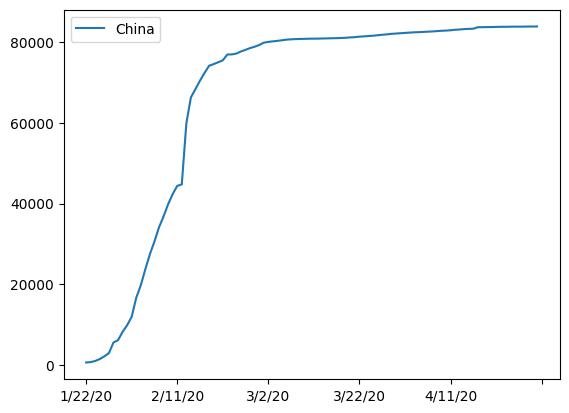

In [9]:
# Visualizing data for a country, example: China
corona_data_set_aggregated.loc["China"].plot()
plt.legend()
plt.show()

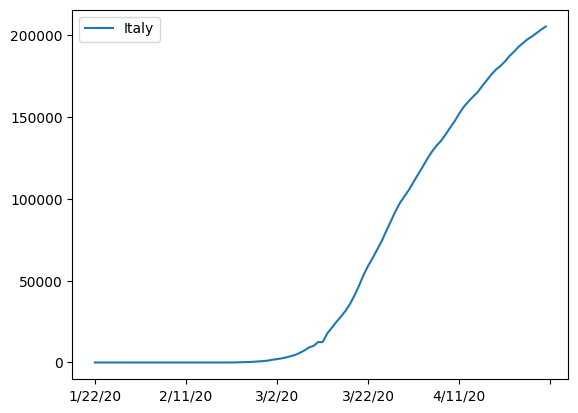

In [10]:
# Compare it to "Italy"
corona_data_set_aggregated.loc["Italy"].plot()
plt.legend()
plt.show()

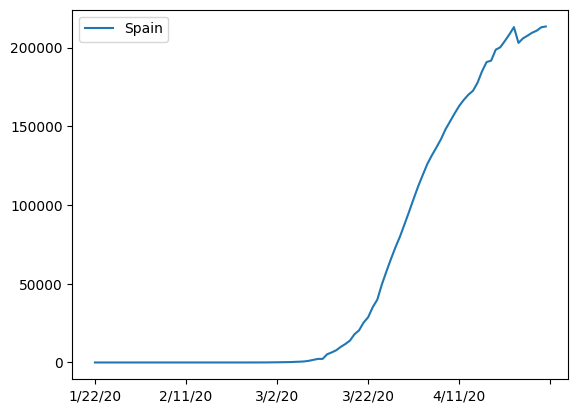

In [11]:
# Add "Spain"
corona_data_set_aggregated.loc["Spain"].plot()
plt.legend()
plt.show()

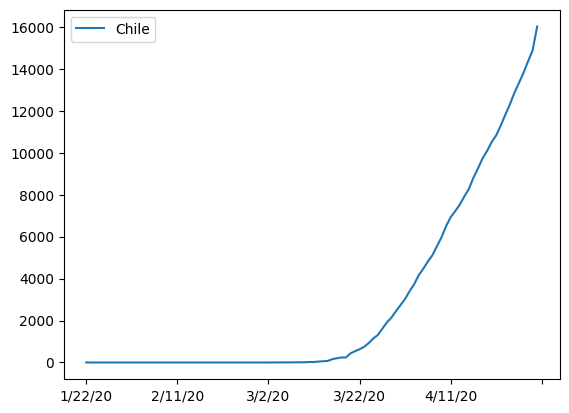

In [12]:
# Add "Chile"
corona_data_set_aggregated.loc["Chile"].plot()
plt.legend()
plt.show()

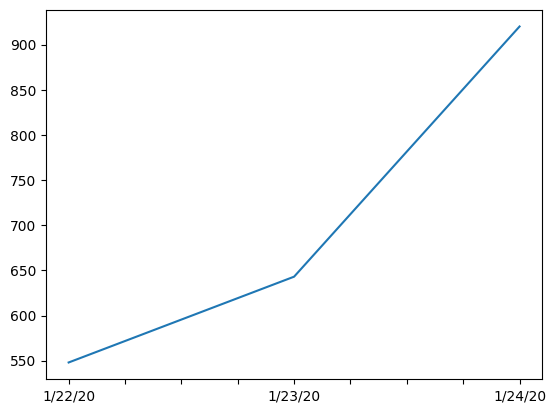

In [13]:
# Calculating a good measure
# Para este ejemplo, tomar los primeros 3 días
corona_data_set_aggregated.loc["China"][:3].plot()
plt.show()

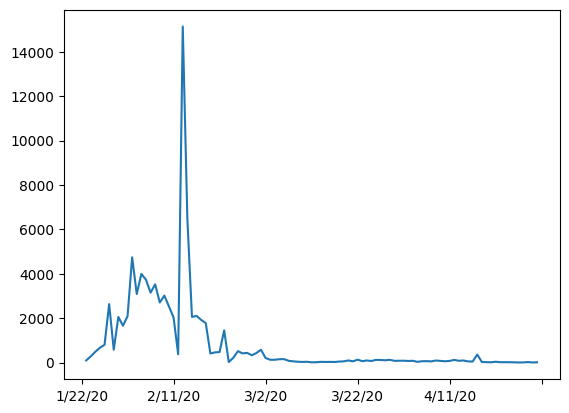

In [14]:
# Calculate the maximum number of new cases in the period
corona_data_set_aggregated.loc["China"].diff().plot()
plt.show()

In [15]:
# We get the max value of the differentials
corona_data_set_aggregated.loc["China"].diff().max()

15136.0

In [16]:
# Check Italy
corona_data_set_aggregated.loc["Italy"].diff().max()

6557.0

In [17]:
# Check Spain
corona_data_set_aggregated.loc["Spain"].diff().max()

9630.0

In [18]:
# Find the maximum infection rate of all countries
countries = list(corona_data_set_aggregated.index) #En nuestro ejemplo los paises corresponden a los indices
max_infection_rates = []

In [19]:
for c in countries:
    max_infection_rates.append(corona_data_set_aggregated.loc[c].diff().max())
corona_data_set_aggregated["max_infection_rate"] = max_infection_rates
corona_data_set_aggregated.head()

,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,...,4/27/20,4/28/20,4/29/20,4/30/20,max_infection_rate
Country/Region,,,,,,,,,,,
Afghanistan,0,0,0,0,0,...,1703,1828,1939,2171,232.0
Albania,0,0,0,0,0,...,736,750,766,773,34.0
Algeria,0,0,0,0,0,...,3517,3649,3848,4006,199.0
Andorra,0,0,0,0,0,...,743,743,743,745,43.0
Angola,0,0,0,0,0,...,27,27,27,27,5.0


In [20]:
# Creamos un nuevo data frame para trabajar mas ordenado
corona_data = pd.DataFrame(corona_data_set_aggregated["max_infection_rate"])
corona_data.head()

,max_infection_rate
Country/Region,
Afghanistan,232.0
Albania,34.0
Algeria,199.0
Andorra,43.0
Angola,5.0


In [21]:
# Importing happiness report
happiness_report_csv = pd.read_csv("worldwide_happiness_report.csv",encoding="UTF-8")
happiness_report_csv.head()

,Overall rank,Country or region,Score,GDP per capita,Social support,Healthy life expectancy,Freedom to make life choices,Generosity,Perceptions of corruption
0,1,Finland,7.769,1.340,1.587,0.986,0.596,0.153,0.393
1,2,Denmark,7.600,1.383,1.573,0.996,0.592,0.252,0.410
2,3,Norway,7.554,1.488,1.582,1.028,0.603,0.271,0.341
3,4,Iceland,7.494,1.380,1.624,1.026,0.591,0.354,0.118
4,5,Netherlands,7.488,1.396,1.522,0.999,0.557,0.322,0.298


In [22]:
# Drop useless columns
useless_cols = ["Overall rank","Score","Generosity","Perceptions of corruption"]
happiness_report_csv.drop(useless_cols,axis=1,inplace=True)
happiness_report_csv.head()

,Country or region,GDP per capita,Social support,Healthy life expectancy,Freedom to make life choices
0,Finland,1.340,1.587,0.986,0.596
1,Denmark,1.383,1.573,0.996,0.592
2,Norway,1.488,1.582,1.028,0.603
3,Iceland,1.380,1.624,1.026,0.591
4,Netherlands,1.396,1.522,0.999,0.557


In [23]:
# Change indices of data frame because will make the join process later easier
happiness_report_csv.set_index("Country or region",inplace=True)
happiness_report_csv.head()

,GDP per capita,Social support,Healthy life expectancy,Freedom to make life choices
Country or region,,,,
Finland,1.340,1.587,0.986,0.596
Denmark,1.383,1.573,0.996,0.592
Norway,1.488,1.582,1.028,0.603
Iceland,1.380,1.624,1.026,0.591
Netherlands,1.396,1.522,0.999,0.557


<h1>Now join the datasets</h1>

In [24]:
corona_data.shape

(187, 1)

In [25]:
happiness_report_csv.shape

(156, 4)

In [26]:
# The number of countries in corona_data is 187 and in happiness_report is 156
data  = corona_data.join(happiness_report_csv,how="inner")
data

,max_infection_rate,GDP per capita,Social support,Healthy life expectancy,Freedom to make life choices
Afghanistan,232.0,0.350,0.517,0.361,0.000
Albania,34.0,0.947,0.848,0.874,0.383
Algeria,199.0,1.002,1.160,0.785,0.086
Argentina,291.0,1.092,1.432,0.881,0.471
Armenia,134.0,0.850,1.055,0.815,0.283
...,...,...,...,...,...
Venezuela,29.0,0.960,1.427,0.805,0.154
Vietnam,19.0,0.741,1.346,0.851,0.543
Yemen,5.0,0.287,1.163,0.463,0.143
Zambia,9.0,0.578,1.058,0.426,0.431


In [27]:
# Correlation matrix
data.corr()

,max_infection_rate,GDP per capita,Social support,Healthy life expectancy,Freedom to make life choices
max_infection_rate,1.000000,0.250118,0.191958,0.289263,0.078196
GDP per capita,0.250118,1.000000,0.759468,0.863062,0.394603
Social support,0.191958,0.759468,1.000000,0.765286,0.456246
Healthy life expectancy,0.289263,0.863062,0.765286,1.000000,0.427892
Freedom to make life choices,0.078196,0.394603,0.456246,0.427892,1.000000


<h1>Visualization of results</h1>

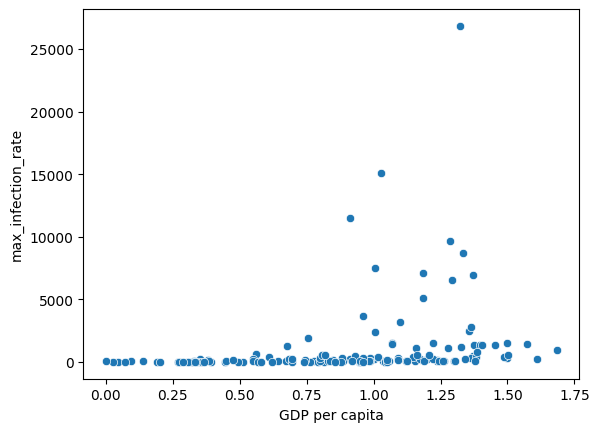

In [28]:
# Plot GDP vs Max infection rate
x = data["GDP per capita"]
y = data["max_infection_rate"]
sns.scatterplot(x=x,y=y)
plt.show()

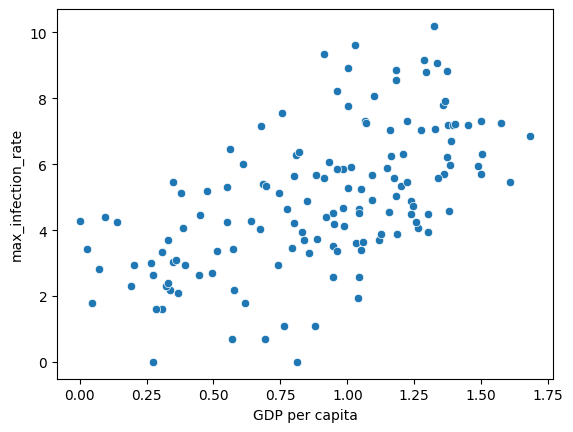

In [29]:
# To fix scaling visualization
sns.scatterplot(x=x,y=np.log(y))
plt.show()

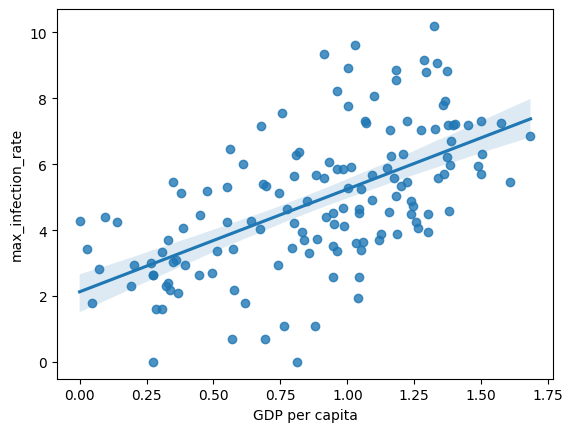

In [30]:
# Another plot
sns.regplot(x=x,y=np.log(y))
plt.show()

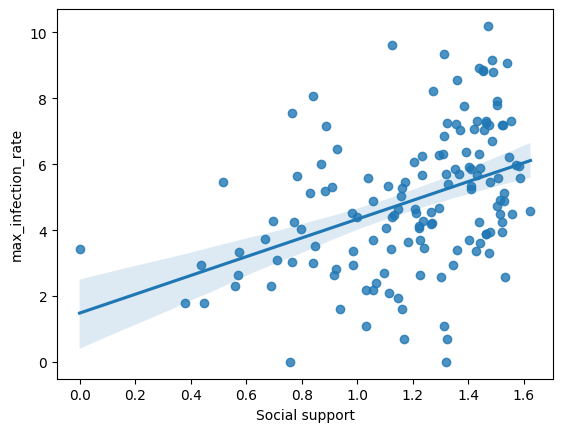

In [31]:
# For other variables
x = data["Social support"]
y = data["max_infection_rate"]
sns.regplot(x=x,y=np.log(y))
plt.show()

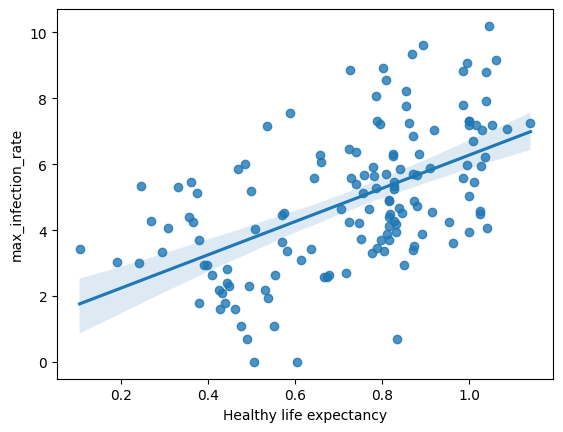

In [32]:
x = data["Healthy life expectancy"]
y = data["max_infection_rate"]
sns.regplot(x=x,y=np.log(y))
plt.show()

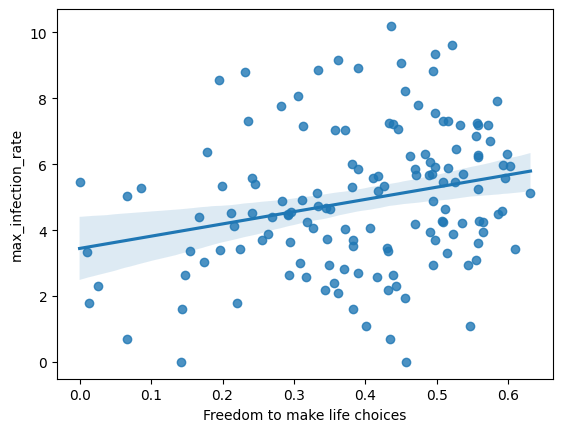

In [33]:
x = data["Freedom to make life choices"]
y = data["max_infection_rate"]
sns.regplot(x=x,y=np.log(y))
plt.show()

In [34]:
# Bonus
confirmed_deaths = pd.read_csv("covid19_deaths_dataset.csv",encoding="UTF-8")

In [35]:
# Borrar columnas inútiles
confirmed_deaths.drop(["Lat","Long"],axis=1,inplace=True)

In [36]:
# Agrupar por países
confirmed_deaths_aggregated = confirmed_deaths.groupby("Country/Region").sum()
confirmed_deaths_aggregated

,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,...,4/26/20,4/27/20,4/28/20,4/29/20,4/30/20
Country/Region,,,,,,,,,,,
Afghanistan,0,0,0,0,0,...,50,57,58,60,64
Albania,0,0,0,0,0,...,28,28,30,30,31
Algeria,0,0,0,0,0,...,425,432,437,444,450
Andorra,0,0,0,0,0,...,40,40,41,42,42
Angola,0,0,0,0,0,...,2,2,2,2,2
...,...,...,...,...,...,...,...,...,...,...,...
West Bank and Gaza,0,0,0,0,0,...,2,2,2,2,2
Western Sahara,0,0,0,0,0,...,0,0,0,0,0
Yemen,0,0,0,0,0,...,0,0,0,0,2


In [37]:
# Encontrar el total de muertes para cada país
#En nuestro ejemplo los paises corresponden a los indices
countries = list(confirmed_deaths_aggregated.index)
total_deaths = []

In [38]:
for country in countries:
    total_deaths.append(confirmed_deaths_aggregated.loc[country].sum())
confirmed_deaths_aggregated["total deaths"] = total_deaths
confirmed_deaths_aggregated

,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,...,4/27/20,4/28/20,4/29/20,4/30/20,total deaths
Country/Region,,,,,,,,,,,
Afghanistan,0,0,0,0,0,...,57,58,60,64,889
Albania,0,0,0,0,0,...,28,30,30,31,819
Algeria,0,0,0,0,0,...,432,437,444,450,9521
Andorra,0,0,0,0,0,...,40,41,42,42,956
Angola,0,0,0,0,0,...,2,2,2,2,66
...,...,...,...,...,...,...,...,...,...,...,...
West Bank and Gaza,0,0,0,0,0,...,2,2,2,2,67
Western Sahara,0,0,0,0,0,...,0,0,0,0,0
Yemen,0,0,0,0,0,...,0,0,0,2,2


In [39]:
# Creamos data frame para análisis
bonus_data = pd.DataFrame(confirmed_deaths_aggregated["total deaths"])
death_data = bonus_data.join(happiness_report_csv,how="inner")
death_data

,total deaths,GDP per capita,Social support,Healthy life expectancy,Freedom to make life choices
Afghanistan,889,0.350,0.517,0.361,0.000
Albania,819,0.947,0.848,0.874,0.383
Algeria,9521,1.002,1.160,0.785,0.086
Argentina,3640,1.092,1.432,0.881,0.471
Armenia,539,0.850,1.055,0.815,0.283
...,...,...,...,...,...
Venezuela,277,0.960,1.427,0.805,0.154
Vietnam,0,0.741,1.346,0.851,0.543
Yemen,2,0.287,1.163,0.463,0.143
Zambia,62,0.578,1.058,0.426,0.431


In [40]:
death_data.corr()

,total deaths,GDP per capita,Social support,Healthy life expectancy,Freedom to make life choices
total deaths,1.000000,0.232279,0.178278,0.282871,-0.006343
GDP per capita,0.232279,1.000000,0.759468,0.863062,0.394603
Social support,0.178278,0.759468,1.000000,0.765286,0.456246
Healthy life expectancy,0.282871,0.863062,0.765286,1.000000,0.427892
Freedom to make life choices,-0.006343,0.394603,0.456246,0.427892,1.000000


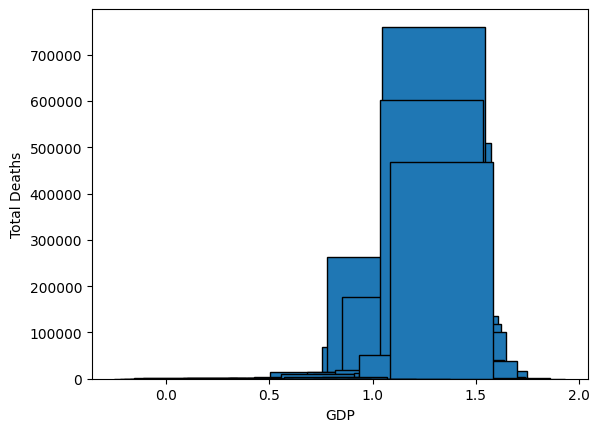

In [41]:
x = death_data["GDP per capita"]
y = death_data["total deaths"]
plt.bar(x,y,edgecolor="black",width=0.5)
plt.xlabel("GDP")
plt.ylabel("Total Deaths")
plt.show()

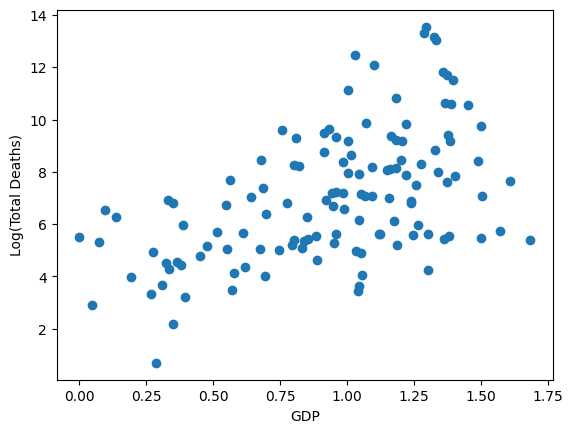

In [42]:
    

plt.scatter(x,np.log(y))
plt.xlabel("GDP")
plt.ylabel("Log(Total Deaths)")
plt.show()